<a href="https://colab.research.google.com/github/project-ida/nuclear/blob/matt-sandbox/nuclear-energetics.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/nuclear/blob/matt-sandbox/nuclear-energetics.ipynb" target="_blank"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# Energetics of nuclear reactions

This notebook is about the energy involved in nuclear processes. We take a look at
1. Binding energy
2. Kinetic energy of alpha decay

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Binding energy

Binding energy is the amount of energy you need to put into a nucleus in order to separate it into its constituent protons and neutrons.

There are many places where you can find data about the binding energy for different nuclei - we will look at two of them.

### PNPI - [Petersburg Nuclear Physics Institute]((http://dbserv.pnpi.spb.ru/))

A PDF of the binding energy data can be found [here](http://dbserv.pnpi.spb.ru/elbib/tablisot/toi98/www/astro/table2.pdf). We have reformatted the data into a csv file to make it easier to analyse.

In [2]:
# source data http://dbserv.pnpi.spb.ru/elbib/tablisot/toi98/www/astro/table2.pdf
pnpi = pd.read_csv("./data/binding-energies-pnpi.csv",header=7)

In [3]:
pnpi.head()

,A,EL,BE (MeV)
0,1,H,0.0000
1,2,H,2.2245
2,3,H,8.4820
3,3,He,7.7186
4,4,He,28.2970


The PNPI data above contains the following columns of data:
- **A** - Atomic mass number
- **EL** - Element label
- **BE (MeV)** - Binding energy in MeV

It is instructive to calculate the binding energy per nucleon - this gives us a sense of which nuclei are particularly stable.

In [4]:
pnpi["BE/A (MeV)"] = pnpi["BE (MeV)"]/pnpi["A"]

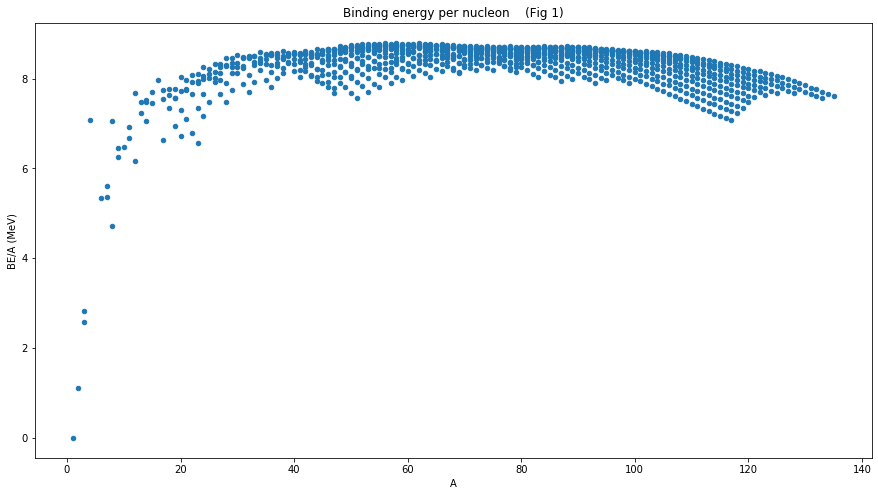

In [5]:
pnpi.plot.scatter(x="A", y="BE/A (MeV)",figsize=(15,8), title="Binding energy per nucleon    (Fig 1)");

The most stable element is the one with maximum binding energy per nucleon - it is $^{62}Ni$

In [6]:
pnpi.loc[pnpi["BE/A (MeV)"].argmax()]

A                  62
EL                 Ni
BE (MeV)      545.268
BE/A (MeV)    8.79465
Name: 371, dtype: object

The hump shape of Fig 1 indicates that energy can be released from nuclear fusion of light elements and nuclear fission of heavy elements. 

The current data only goes up to atomic mass 135. To go further we need to look at a different dataset

### IAEA nuclear data services - [Atomic Mass Data Center](https://www-nds.iaea.org/amdc/)

A txt file containing the binding energy data can be found [here](https://www-nds.iaea.org/amdc/ame2016/mass16.txt). We have reformatted the data into a csv file to make it easier to analyse and excluded non-experimental values (denoted by # in the original txt file).

In [7]:
# source data https://www-nds.iaea.org/amdc/ame2016/mass16.txt
iaea = pd.read_csv("./data/binding-energies-iaea.csv",header=13)

In [8]:
iaea.head()

,N,Z,A,EL,DEL_M (keV),BE/A (keV),Mass (mu-u)
0,1,0,1,n,8071.31713,0.000,1008664.916
1,0,1,1,H,7288.97061,0.000,1007825.032
2,1,1,2,H,13135.72176,1112.283,2014101.778
3,2,1,3,H,14949.80993,2827.265,3016049.282
4,1,2,3,He,14931.21793,2572.680,3016029.323


The IAEA data above contains the following columns of data:
- **N** - Number of neutrons
- **Z** - Number of protons
- **A** - Atomic mass number
- **EL** - Element label
- **DEL_M (keV)** - [Mass excess](https://en.wikipedia.org/wiki/Mass_excess) in keV
- **BE/A (keV)** - Binding energy per nucleon in keV
- **Mass (mu-u)** - Atomic mass in millionths of a standard atomic mass unit ([Dalton](https://en.wikipedia.org/wiki/Dalton_(unit)))

Let's renormalise our energy units into MeV instead of keV

In [9]:
iaea["BE/A (keV)"] = iaea["BE/A (keV)"]/1000
iaea["DEL_M (keV)"] = iaea["DEL_M (keV)"]/1000
iaea.rename(columns={'BE/A (keV)': 'BE/A (MeV)', 'DEL_M (keV)': 'DEL_M (MeV)'}, inplace=True)

In [10]:
iaea.head()

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (mu-u)
0,1,0,1,n,8.071317,0.000000,1008664.916
1,0,1,1,H,7.288971,0.000000,1007825.032
2,1,1,2,H,13.135722,1.112283,2014101.778
3,2,1,3,H,14.949810,2.827265,3016049.282
4,1,2,3,He,14.931218,2.572680,3016029.323


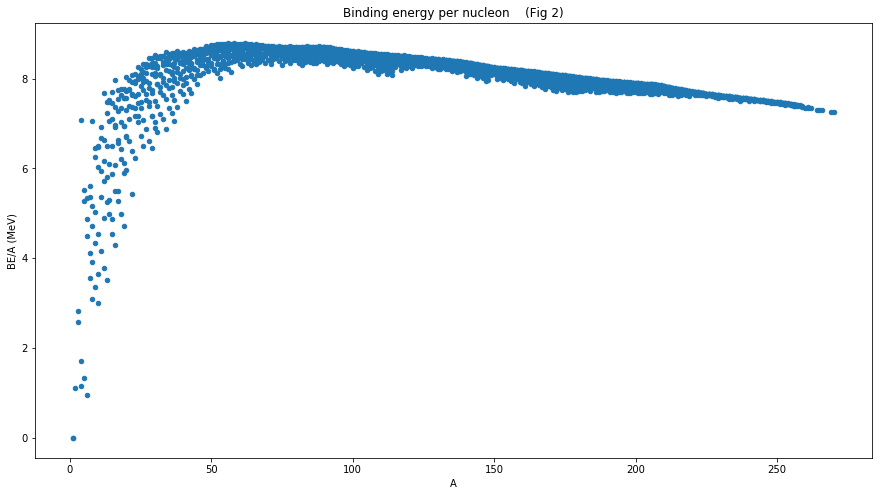

In [11]:
iaea.plot.scatter(x="A", y="BE/A (MeV)",figsize=(15,8), title="Binding energy per nucleon    (Fig 2)");

Fig 2 is much more similar to what we see in text books at school. 

We can also check to see whether the IAEA data agrees with PNPI about the most stable element.

In [12]:
iaea.loc[iaea["BE/A (MeV)"].argmax()]

N                       34
Z                       28
A                       62
EL                      Ni
DEL_M (MeV)       -66.7463
BE/A (MeV)         8.79455
Mass (mu-u)    6.19283e+07
Name: 441, dtype: object

$^{62}Ni$ again - lovely.

We are now going to use the IAEA data to look at the energetics of alpha decay.

## Kinetic energy of alpha decay

[Alpha decay](https://en.wikipedia.org/wiki/Alpha_decay) is a process that involves an unstable parent nucleus "spitting out" a $^4He$ nucleus (aka an alpha particle)

In [13]:
alpha = iaea[(iaea["Z"]==2) & (iaea["N"]==2)]

In [14]:
alpha

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (mu-u)
6,2,2,4,He,2.424916,7.073915,4002603.254


Alpha decay therefore creates a daughter nucleus with 2 fewer protons and 2 fewer neutrons. 

We are now going to "hunt" for possible alpha decays in the list of IAEA elements. This will involve:
1. For each parent element, find the daughter element with 2 fewer protons and neutrons
2. Calculate the mass/energy difference between the parent and (daughter+alpha) to determine whether such a decay is energetically possible.

### Finding daughter elements

Let's take each element of the iaea table and see how many neutrons and protons are left after subtracting the alpha particle.

In [15]:
daughter_NZ = iaea[["N","Z"]] - alpha[["N","Z"]].values

In [16]:
daughter_NZ.head(10)

,N,Z
0,-1,-2
1,-2,-1
2,-1,-1
3,0,-1
4,-1,0
5,1,-1
6,0,0
7,-1,1
8,2,-1
9,1,0


The negative values above tell us that some of the elements cannot undergo alpha decay because there aren't enough protons and neutrons to start with. The first element that could in principle split out an alpha is number 9. what element is this?

In [17]:
iaea.loc[[9]]

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (mu-u)
9,3,2,5,He,11.231233,5.512132,5012057.224


$^5He$ is the first element in the list - if it releases an alpha we should be left with a neutron. Let's check this.

In [18]:
iaea[(iaea["N"] == daughter_NZ.loc[9]["N"]) & (iaea["Z"] == daughter_NZ.loc[9]["Z"])]

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (mu-u)
0,1,0,1,n,8.071317,0.0,1008664.916


Let's now automate the above process of finding the daughter element (for those that have one).

In [19]:
parent_index = []
daughter_index = []
for i, row in daughter_NZ.iterrows():
    try:
        daughter_index.append(iaea[(iaea["N"]==row["N"]) & (iaea["Z"]==row["Z"])].index[0])
        parent_index.append(i)
    except:
        continue

In [20]:
parents_alpha_decay = iaea.loc[parent_index]
parents_alpha_decay.reset_index(inplace=True, drop=True)

daughters_alpha_decay = iaea.loc[daughter_index]
daughters_alpha_decay.reset_index(inplace=True, drop=True)

In [21]:
parents_alpha_decay.head()

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (mu-u)
0,3,2,5,He,11.231233,5.512132,5012057.224
1,2,3,5,Li,11.678886,5.266132,5012537.800
2,3,3,6,Li,14.086879,5.332331,6015122.887
3,4,3,7,Li,14.907105,5.606439,7016003.437
4,3,4,7,Be,15.768999,5.371548,7016928.717


In [22]:
daughters_alpha_decay.head()

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (mu-u)
0,1,0,1,n,8.071317,0.000000,1008664.916
1,0,1,1,H,7.288971,0.000000,1007825.032
2,1,1,2,H,13.135722,1.112283,2014101.778
3,2,1,3,H,14.949810,2.827265,3016049.282
4,1,2,3,He,14.931218,2.572680,3016029.323


We can sense check the above `parents` and `daughters` tables by noting that the first rows correspond to the $^5He \rightarrow n + \alpha$ reaction that we did manually earlier.

Now that we have two tables which pair the parents and daughters together, we need to find out if these reactions are allowed to take place from an energy conservation perspective.

### Energy conservation

So far we have found some candidate alpha decay reactions. For these reactions to happen spontaneously, it is necessary that the energy of the products (i.e. daughter + alpha) be less than the energy of the parent. The difference in energy is then carried away as kinetic energy of the products (ignoring any radiation for the moment).

We can calculate the energy difference in a couple of ways
1. Using the mass excess as described [here](https://en.wikipedia.org/wiki/Mass_excess#Example)
2. Using the binding energy

We'll do both as a double check.

**Mass excess**

Spontaneous alpha decay happens when the products have a lower mass/energy compared to the parent.

In [23]:
energy_alpha_decay = parents_alpha_decay["DEL_M (MeV)"] - (daughters_alpha_decay["DEL_M (MeV)"] + alpha["DEL_M (MeV)"].values[0])
possible_alpha_decays = energy_alpha_decay > 0

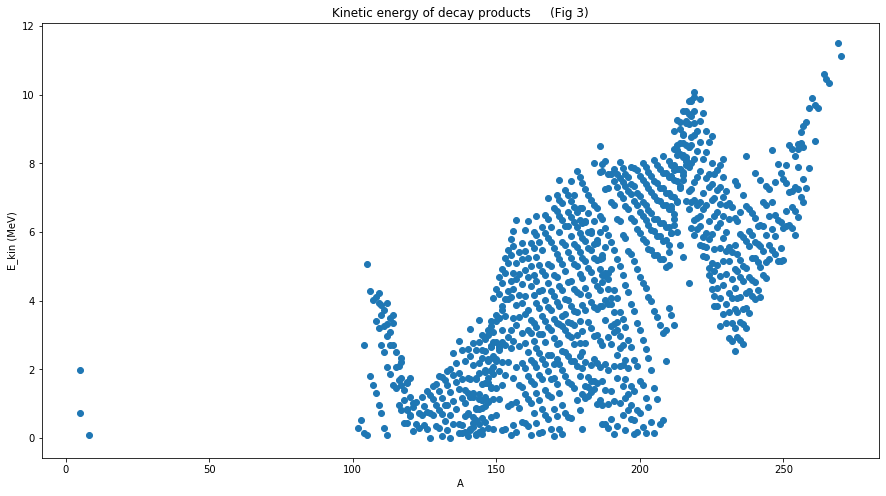

In [24]:
plt.figure(figsize=(15,8))
plt.scatter(parents_alpha_decay[possible_alpha_decays]["A"], energy_alpha_decay[possible_alpha_decays])
plt.xlabel("A")
plt.ylabel("E_kin (MeV)")
plt.title("Kinetic energy of decay products     (Fig 3)");

**Binding energy**

Calculating using binding energy is a bit different to mass excess. Spontaneous alpha decay happens when the products have a higher binding energy compared to the parent, i.e. the products are in a more stable configuration than the parent.

In [25]:
parents_binding_energy  = parents_alpha_decay["A"]*parents_alpha_decay["BE/A (MeV)"]
daughters_biding_energy = daughters_alpha_decay["A"]*daughters_alpha_decay["BE/A (MeV)"]
alpha_binding_energy    = 4*alpha["BE/A (MeV)"].values[0]

energy_alpha_decay = (daughters_biding_energy + alpha_binding_energy) - parents_binding_energy
possible_alpha_decays = energy_alpha_decay > 0

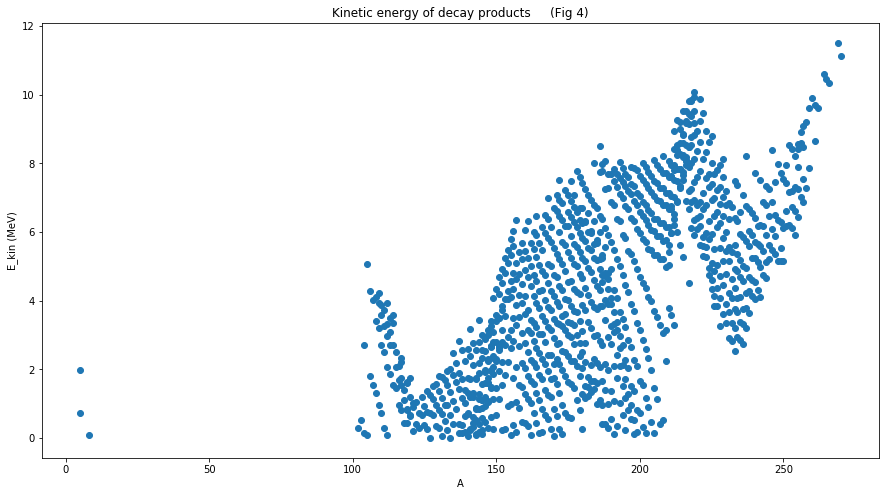

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(parents_alpha_decay[possible_alpha_decays]["A"], energy_alpha_decay[possible_alpha_decays])
plt.xlabel("A")
plt.ylabel("E_kin (MeV)");
plt.title("Kinetic energy of decay products     (Fig 4)");